In [1]:
import glob
from rectify import rectify
from astropy.io import fits
import astropy.constants
import astropy.time
import os
from campfires import campfires

In [2]:
outbase = '../../src/EUI/HRI/euv174/20221024/frederic_carrington'
shape = (250, 250)
lonlims = (150, 153)
latlims = (16, 18.5)

path = '../../src/EUI/HRI/euv174/20221024/' 

files = glob.glob(os.path.join(path, 'solo_L2_eui-hrieuv174-image*.fits'))[:]

solar_r = 1.004

In [3]:
for i, f in enumerate(files):

    euimap = fits.getdata(f)
    header = fits.getheader(f, 1) 

    spherical = rectify.CarringtonTransform(header, radius_correction=solar_r)
    spherizer = rectify.Rectifier(spherical)
    carrington = spherizer(euimap, shape, lonlims, latlims, opencv=False, order=2)

    out = os.path.join(outbase, os.path.basename(f))
    out = out.replace('_L2_', '_L3_')
    out = out.replace('.fits', '_carrington.fits')

    header['MAPPINGR'] = solar_r*astropy.constants.R_sun.value
    header['CACRPIX1'] = (shape[0] + 1)/2
    header['CACRPIX2'] = (shape[1] + 1)/2
    header['CACRVAL1'] = (lonlims[1] + lonlims[0])/2
    header['CACRVAL2'] = (latlims[1] + latlims[0])/2
    header['CACDELT1'] = (lonlims[1] - lonlims[0])/(shape[0]-1)
    header['CACDELT2'] = (latlims[1] - latlims[0])/(shape[1]-1)
    fits.writeto(out, carrington, header=header, overwrite=True)

In [22]:
def detect_campfire_eui(paths,output_filename,sigma=8.34,dmin=0):
    seq = campfires.Sequence(paths, fov=None)
    seq.extract_events(sigma=sigma, dmin=dmin, vmin=1)
    seq.events_totable(output_filename=output_filename)
    seq.plot_statistics()
    seq.plot_events()
    seq.events_tofits() 

    return seq


In [23]:
output_dir = "../../sav/campfires/20221024/east_1/EvtCatalog_20221024_east_1"

3672


/home/yjzhu/anaconda3/envs/campfire/lib/python3.11/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


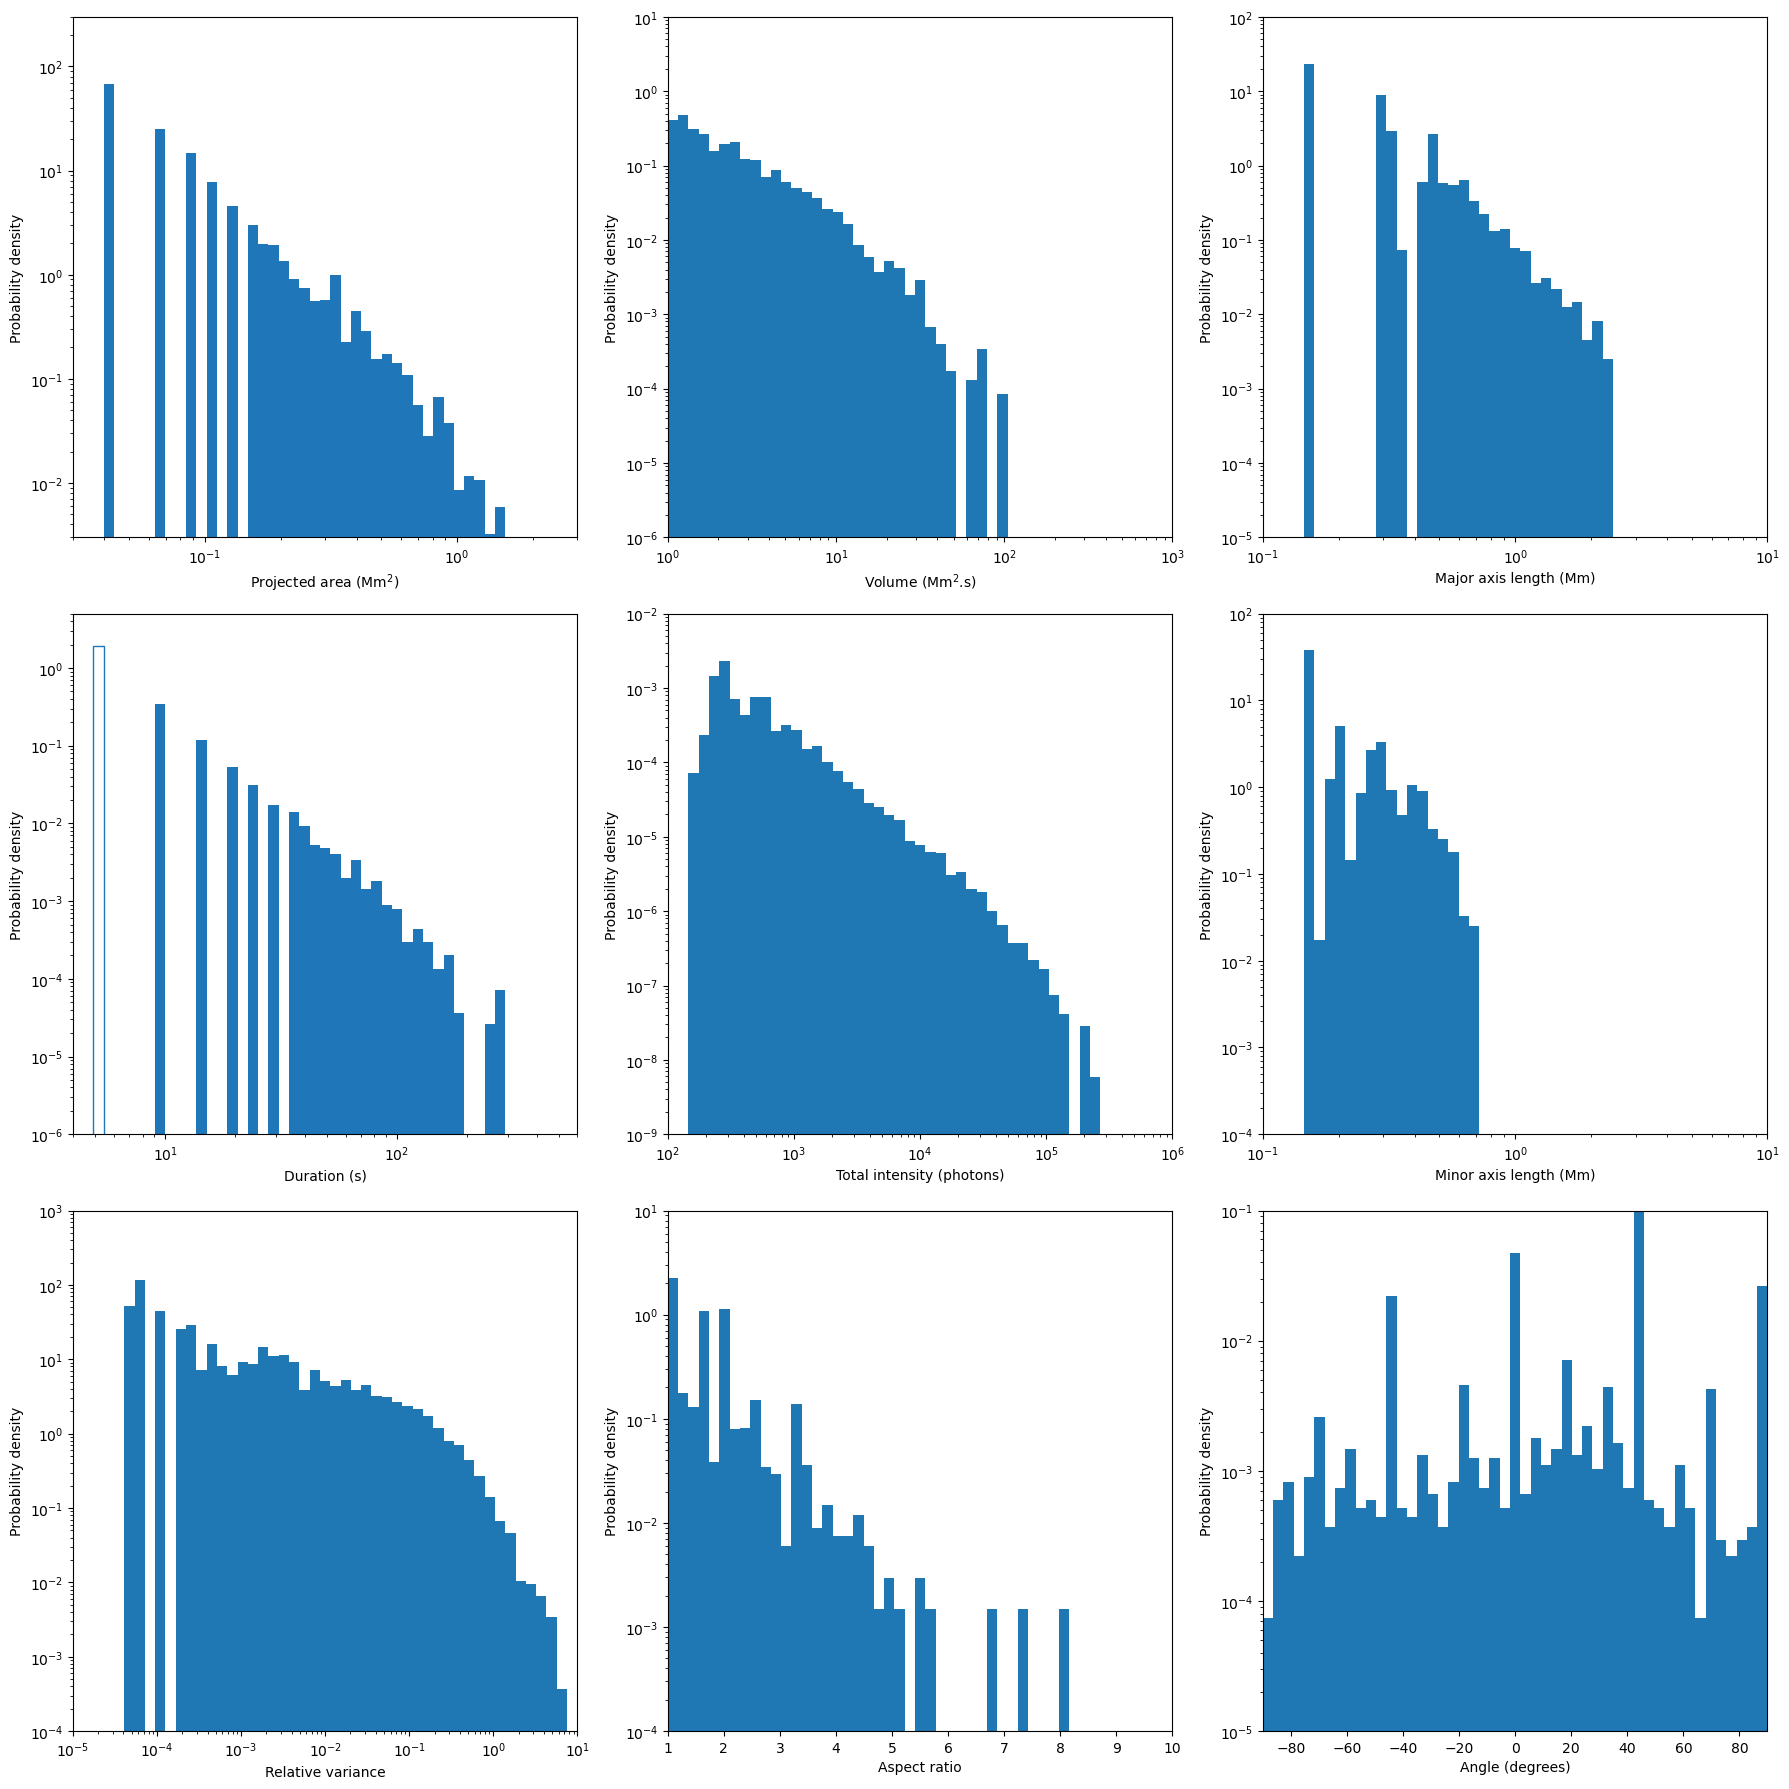

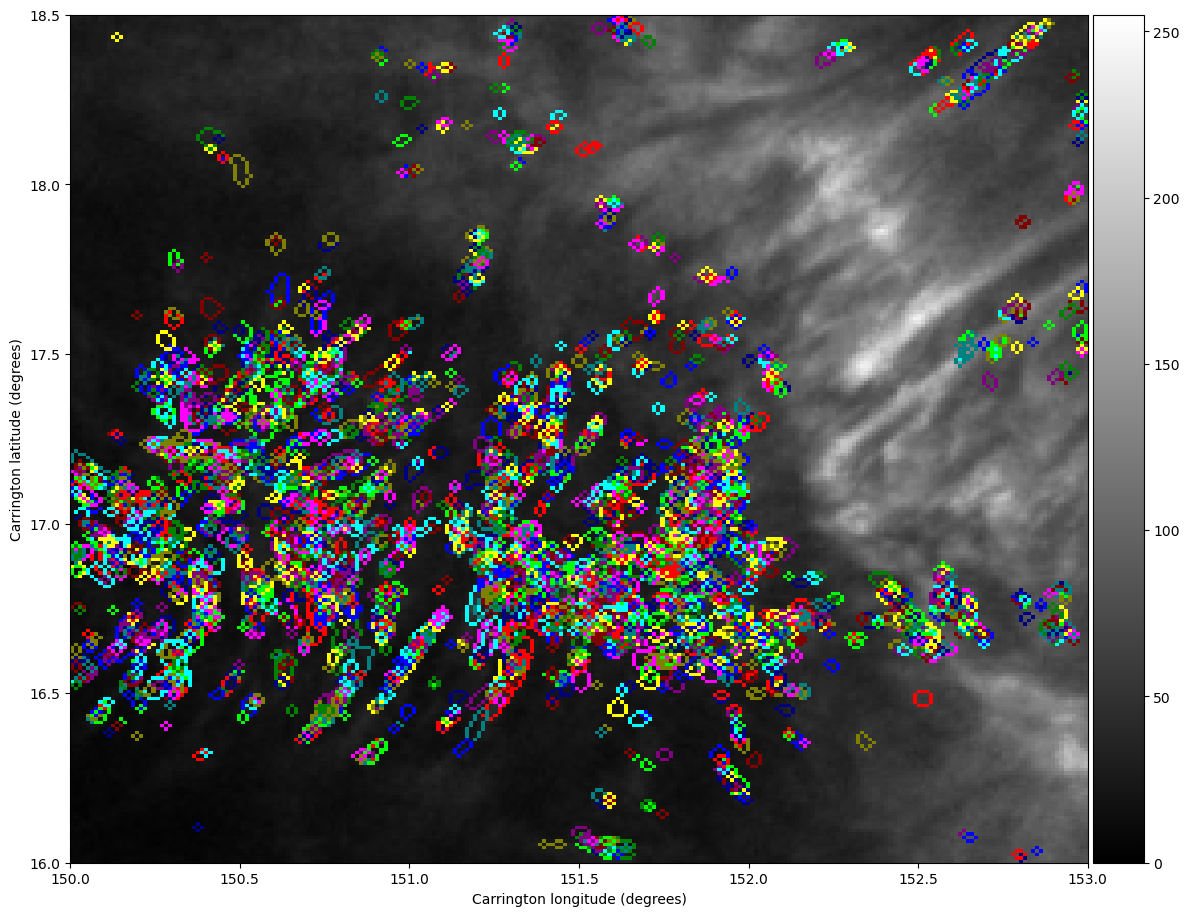

In [24]:
seq_east_1 = detect_campfire_eui([outbase],output_dir,sigma=9,dmin=1)

In [25]:
seq_east_1.make_movies(width=200, height=200)

ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 12.3.0 (conda-forge gcc 12.3.0-5)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1710227007179/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1710227007179/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_1710227007179/_build_env/bin/x86_64-conda-linux-gnu-c++ --nm=/home/conda/feedstock_root/build_artifacts/ffmpeg_1710227007179/_build_env/bin/x86_64-conda-linux-gnu-nm --ar=/home/conda/feedstock_root/build_artifacts/ffmpeg_1710227007179/_build_env/bin/x86_64-conda-linux-gnu-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libo

IndexError: cannot do a non-empty take from an empty axes.